# Analyse de données d'une librairie en ligne


### Table des matiéres

* [Objectifs](#Intro)
* [A. Import des données](#chapitre1)
    * [1. Customers](#petit1) 
    * [2. Products](#petit2) 
    * [3. Transactions](#petit3)     
* [B. Nettoyage et préparation des données](#chapitre2)
    * [1. Nettoyage du ficher customers](#petit4)       
        * [a)information](#tit1)                        
        * [b)Verification de la presence de doublon](#tit2)
        * [c)Creation de la ligne age]((#tit3)            
    * [2. Nettoyage du ficher products ](#petit5)           
        * [a)information](#tit4)                            
        * [b)Verification de la presence de doublon](#tit5) 
        * [c)Identification d'un prix negatif](#tit6)       
    * [3. Nettoyage du ficher transactions ](#petit6)       
        * [a)information](#tit7)                           
        * [b)Verification de la presence de doublon](#tit8)  
        * [c)Elimination des valeurs test(prix negatifs)](#tit10) 
* [C. Jointure](#chapitre3)                                       
    * [1. merge des tables transactions et products](#petit7)     
    * [2. idendification de produits non achetés](#petit8)         
    * [3. merge des tables produits vendu et customers](#petit9)   
    * [4.Identification de cliens sans achats](#petit10)           
* [ D. Analyse des données](#chapitre4)                           
    * [1. IIdentification de produits sans prix](#petit11)        
    * [2. Identification de clients pro](#petit12)                 
    * [3. Etude temporel ](#petit13)                              
    * [4. Expliciter categorie par prix](#petit14)                
    * [5. Calcule du chiffre d'affaire ](#petit15)
        * [a) chiffre d'affaire avec les pro](#tit11)
        * [b) chiffre d'affaire sans les pro](#tit12)
        * [c) chiffre d'affaire par produit](#tit13)
    * [6. Recherche et identification d'outliers ](#petit16)      
    * [6. Groupe](#petit17)                                       


# Objectif <a class="anchor" id="Intro"></a>

    Le but de ce notebook est d'avoir une meilleure connaissance des données recolté par la librairie en ligne et d'avoir une vision globale des commandes, des produits vendus mais aussi des clients et de leurs préférences d'achat.

## A. Import des données <a class="anchor" id="chapitre1"></a>

In [40]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import date

In [41]:
def todataframe(nom):
    #le mettre en dataframe (et plus en serie)
    nom = nom.to_frame()
    # ajouté un index
    nom = nom.reset_index()
    return nom

Dans un premier temps nous avons crée une base de donnée sur MySQL workbench. Nous avons crée une table par document puis importé sur le jupiter. La ligne de code ci-dessous nous permet de connecté notre base de donnée à notre jupyter.  

In [42]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='simplon',db='librairie_en_ligne')

### 1) Customers <a class="anchor" id="petit1"></a>

In [43]:
customers=pd.read_sql_query("SELECT * FROM customers " ,conn)
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


### 2) Products <a class="anchor" id="petit2"></a>

In [44]:
products=pd.read_sql_query("SELECT * FROM products " ,conn)
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


### 3) Transactions <a class="anchor" id="petit3"></a>

In [45]:
transactions= pd.read_csv("transactions.csv", encoding='latin_1')
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


## B. Nettoyage et préparation des données                  <a class="anchor" id="chapitre2"></a>

### 1) Nettoyage du ficher customers <a class="anchor" id="petit4"></a>

#### a) Information  <a class="anchor" id="tit1"></a>

In [46]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Le fichier customers posséde 3 colonnes et 8623 lignes et il n'y a pas de valeur NaN ou valeur manquante.

#### b) Verification de la presence de doublon <a class="anchor" id="tit2"></a>

In [47]:
customers.duplicated(['client_id']).value_counts()

False    8623
dtype: int64

Nous avons utilisé la fonction duplicated() pour identifié s'il y avait la presence de valeur double, ce qui n'est pas le cas. Nous avons choisi de tester la colonne client_id car elle nous permettra de joindre la table customers à la table transaction. 
Nous avons voulut verifié que la colonne sex etait bien constitué uniquement de femme et d'homme.

In [48]:
femme = customers.sex.loc[customers.sex  == "f"].count()
homme =customers.sex.loc[customers.sex  == "m"].count()
[femme,homme]

[4491, 4132]

In [49]:
femme+homme

8623

In [50]:
customers['birth'].min()

1929

In [51]:
customers['birth'].max()

2004

Les clients les plus vieux sont nées en 1929 et les plus jeunes en 2004. Nous avons calculé l'age des clients et ajouté dans une nouvelle colonne Age.

#### c) Creation d'une colonne age <a class="anchor" id="tit3"></a>

In [52]:
def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate
 
    return age

cette fonction nous permet de calculer l'age des clients en fonction de la date du jours. 

In [53]:
customers['Age'] = (calculateAge(customers['birth']))
customers

,client_id,sex,birth,Age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


In [54]:
customers['Age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: Age, dtype: float64

### 2) Nettoyage du ficher products  <a class="anchor" id="petit5"></a>

#### a) Information <a class="anchor" id="petit5"></a>

In [55]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


Le fichier products posséde lui aussi 3 colonnes et cette fois ci 3287 lignes. Comme pour le fichier précedent, il n'y a pas de valeur NaN ou valeur manquante.

#### b)Verification de la presence de doublon <a class="anchor" id="tit5"></a>

In [56]:
products.duplicated(['id_prod']).value_counts()

False    3287
dtype: int64

La colonne Id_prod ne contient que des valeurs unique. Cette colonne nous serviras pour joindre la table products à la table transactions.

#### c)Identification d'un prix négatif  <a class="anchor" id="tit6"></a>

In [57]:
products['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

Nous avons utilisé la fonction describe pour observer les valeurs de la colonne des prix. On peut observé une valeur aberante. La valeur minimal de prix est -1. 

In [58]:
negatif = products.loc[products['price']<=0]
negatif
    

,id_prod,price,categ
731,T_0,-1.0,0


Cette valeur aberante ne concerne que le produit T_0 et ne posséde pas de categorie. 

### 3) Nettoyage du ficher transaction <a class="anchor" id="petit6"></a>

#### a) information <a class="anchor" id="tit7"></a>

In [59]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


Le fichier Transactions posséde 4 colonnes et 337016 lignes. Comme pour les fichiers précedent, il n'y a pas de valeur NaN ou valeur manquante.

####  b)Verification de la presence de doublon <a class="anchor" id="tit8"></a>

In [60]:
transactions.duplicated(['id_prod']).value_counts()

True     333750
False      3266
dtype: int64

In [61]:
transactions.duplicated(['client_id']).value_counts()

True     328414
False      8602
dtype: int64

Nous pouvons observé la presence de valeur dupliqué dans les colonnes id_prod et client_id. Il est cependant normal que cela arrive, en effet un client a pu acheté plusieurs produits et un produit a pu etre acheté par plusieurs clients.

#### c) Elimination des valeurs test(prix negatifs) <a class="anchor" id="tit10"></a>

 Nous nous sommes pour un premier temps concentré sur les produits T_0 qui possédent un prix negatif.

In [62]:
neg = transactions.loc[transactions['id_prod'] == 'T_0']
neg

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


On peut observé que ce sont des transactions test. 

In [63]:
client_test1 = customers.loc[customers['client_id'] == 'ct_1']
client_test1

,client_id,sex,birth,Age
8494,ct_1,m,2001,21


In [64]:
client_test2 = customers.loc[customers['client_id'] == 'ct_0']
client_test2 

,client_id,sex,birth,Age
2735,ct_0,f,2001,21


Il faut supprimer les client ct_0 et ct_1 et les les produits T_0.

In [65]:
transaction=transactions.loc[transactions['id_prod'] != 'T_0']
transaction

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [66]:
product=products.loc[products['id_prod'] != 'T_0']
product

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [67]:
customer=customers.loc[(customers['client_id'] != 'ct_0') & (customers['client_id'] != 'ct_1')]
customer

,client_id,sex,birth,Age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


## C. jointure <a class="anchor" id="chapitre3"></a>

Nous avons donc d'abord joint la table transaction avec la table products.

### 1. Merge des tables transactions et products <a class="anchor" id="petit7"></a>

Nous avons joint les deux tables en utilisant un merge python.

In [68]:
table = pd.merge(transaction, product, on='id_prod', how='outer',indicator=True)
table

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0,both
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0,both
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0,both
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0,both
...,...,...,...,...,...,...,...
336833,0_525,NaN,NaN,NaN,2.99,0.0,right_only
336834,2_86,NaN,NaN,NaN,132.36,2.0,right_only
336835,0_299,NaN,NaN,NaN,22.99,0.0,right_only
336836,0_510,NaN,NaN,NaN,23.66,0.0,right_only


Pour le faire en sql:

In [69]:
#jointure_squl= pd.read_sql_query("SELECT *FROM transactions LEFT JOIN products ON transactions.id_prod = products.id_prod " ,conn)
#jointure_squl                 

Nous n'avons pas utilisé la jointure SQL mais celle par python comme nous avions commencé a travaillé et nettoyé les données avec python. 

### 2. idendification de produits non achetés <a class="anchor" id="petit8"></a>

Certains produits ont n'ont pas de client_id, date ou session_id associé. ces produits n'ont donc pas été acheté.

In [70]:
table['client_id'].isnull().sum()

22

22 produits sont concernées. Nous les avons séparer dans un df séparé.

In [71]:
Produit_non_vendu=table.loc[(table['_merge'] == 'right_only')]
Produit_non_vendu

,id_prod,date,session_id,client_id,price,categ,_merge
336816,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
336817,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
336818,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
336819,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
336820,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
336821,1_0,NaN,NaN,NaN,31.82,1.0,right_only
336822,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
336823,0_1800,NaN,NaN,NaN,22.05,0.0,right_only
336824,0_1645,NaN,NaN,NaN,2.99,0.0,right_only
336825,0_322,NaN,NaN,NaN,2.99,0.0,right_only


Pour analysé les produits non acheté nous les avons groupé par categorie.

In [72]:
non_vendu = Produit_non_vendu['price'].groupby(Produit_non_vendu['categ']).describe()
non_vendu

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0.0,17.0,13.650,11.611998,0.80,2.9900,20.080,22.9900,35.06
1.0,2.0,35.775,5.593215,31.82,33.7975,35.775,37.7525,39.73
2.0,3.0,164.890,48.790141,132.36,136.8400,141.320,181.1550,220.99


17 produits appartiennent a la premiere categorie. 

<AxesSubplot:xlabel='categ', ylabel='price'>

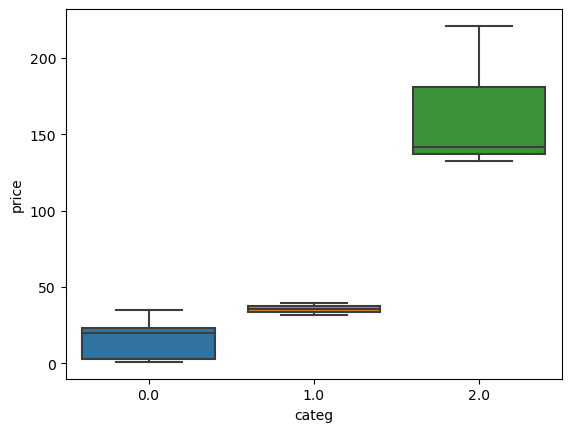

In [73]:
sns.boxplot(data=Produit_non_vendu, x="categ", y="price")

### 3. merge des tables produits vendu et customers <a class="anchor" id="petit9"></a>

Nous avons recupéré tout les produits vendu et nous avons verifié que la table ne contenait pas de valeur nul avant de realisé la jointure avec la table customer.

In [74]:
Produit_vendu=table.loc[(table['_merge'] != 'right_only')]
Produit_vendu['client_id'].isnull().sum()

0

In [75]:
tables = pd.merge(Produit_vendu, customer, on='client_id', how='outer')
tables

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,45
...,...,...,...,...,...,...,...,...,...,...
336832,NaN,NaN,NaN,c_862,NaN,NaN,NaN,f,1956,66
336833,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960,62
336834,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001,21
336835,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993,29


Nous avons pu observé que certaint  clients n'ont pas acheté de produit.

### 4.Identification de cliens sans achats <a class="anchor" id="petit10"></a>

In [76]:
client_sans_achat = tables[tables['id_prod'].isnull()]
client_sans_achat.shape

(21, 10)

21 clients n'ont pas acheté de produit. 

In [77]:
sans_achat= client_sans_achat[['client_id','sex','Age']]
sans_achat

,client_id,sex,Age
336816,c_8253,f,21
336817,c_3789,f,25
336818,c_4406,f,24
336819,c_2706,f,55
336820,c_3443,m,63
336821,c_4447,m,66
336822,c_3017,f,30
336823,c_4086,f,30
336824,c_6930,m,18
336825,c_4358,m,23


Nous avons cree un df qui contient uniquement les produits vendu et les clients qui ont acheté. 

In [78]:
dataset= tables[tables['id_prod'].notnull()]
dataset

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,45
...,...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,both,f,1967,55
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,both,m,1933,89
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,both,m,1933,89
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,both,f,1970,52


Nous avons supprimé la colonne merge qui ne nous est plus utile. 

In [79]:
dataset= dataset.drop('_merge', axis=1)
dataset

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45
...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   price       336713 non-null  float64
 5   categ       336713 non-null  float64
 6   sex         336816 non-null  object 
 7   birth       336816 non-null  int64  
 8   Age         336816 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 25.7+ MB


Grâce à la fonction info(), nous pouvons observé qu'il manque des valeurs pour les colonnes prix et categ ( pour 103 lignes)  

## D. Analyse des données <a class="anchor" id="chapitre4"></a>

### 1. Identification de produits sans prix <a class="anchor" id="petit11"></a>

In [81]:
prix_nul= dataset[dataset['price'].isnull()]
prix_nul

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
18202,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,f,1968,54
18203,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,f,1968,54
20708,0_2245,2021-04-17 16:43:16.543156,s_21906,c_7808,NaN,NaN,m,1977,45
27016,0_2245,2021-11-01 14:00:26.535213,s_113219,c_7810,NaN,NaN,m,1978,44
30498,0_2245,2021-09-11 10:52:05.205583,s_88251,c_3468,NaN,NaN,f,1981,41
...,...,...,...,...,...,...,...,...,...
299794,0_2245,2021-09-19 03:08:45.918021,s_92049,c_4935,NaN,NaN,f,1982,40
311031,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,NaN,NaN,m,1933,89
311482,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972,50
324186,0_2245,2021-11-20 20:21:06.505658,s_122593,c_8524,NaN,NaN,f,1982,40


In [82]:
prix_nul.count()

id_prod       103
date          103
session_id    103
client_id     103
price           0
categ           0
sex           103
birth         103
Age           103
dtype: int64

Les données manquante ne semble correspondre que pour le produit 0_2245. Dans un premier temps nous avons associé le produit a la categorie 0.0 ( comme l'indique le 0_ devant le numéro.

In [83]:
dataset['categ'].loc[ dataset['id_prod'] == '0_2245'] = 0.0

In [84]:
dataset

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45
...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52


Nous avons ensuite calculer le prix moyen de la categorie 0.0. Nous donnerons ce prix au produit 0_2245.

In [85]:
prix= dataset[dataset['price'].notnull()]
prix_categ= prix['price'].groupby(prix['categ']).describe()

In [86]:
prix_categ

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0.0,209426.0,10.646828,4.930030,0.62,6.30,9.99,14.45,40.99
1.0,109735.0,20.480106,7.568956,2.00,15.81,19.08,24.98,80.99
2.0,17552.0,75.174949,39.079999,30.99,53.99,62.83,71.21,300.00


In [87]:
dataset['price'].fillna(9.99, inplace = True)

In [88]:
verif= dataset.loc[dataset['id_prod'] == '0_2245']

In [89]:
verif

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
18202,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,9.99,0.0,f,1968,54
18203,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,9.99,0.0,f,1968,54
20708,0_2245,2021-04-17 16:43:16.543156,s_21906,c_7808,9.99,0.0,m,1977,45
27016,0_2245,2021-11-01 14:00:26.535213,s_113219,c_7810,9.99,0.0,m,1978,44
30498,0_2245,2021-09-11 10:52:05.205583,s_88251,c_3468,9.99,0.0,f,1981,41
...,...,...,...,...,...,...,...,...,...
299794,0_2245,2021-09-19 03:08:45.918021,s_92049,c_4935,9.99,0.0,f,1982,40
311031,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,9.99,0.0,m,1933,89
311482,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,9.99,0.0,m,1972,50
324186,0_2245,2021-11-20 20:21:06.505658,s_122593,c_8524,9.99,0.0,f,1982,40


### 2. Identification de clients pro <a class="anchor" id="petit12"></a>

Nous avons décidé par la suite d'etudié les clients. Dans un premier temps nous avons regroupé les lignes client afin de calculerle nombre et la frequence d'achat. 

In [90]:
cliens = dataset['client_id'].groupby(dataset['client_id'])
Cliensdescribe= cliens.describe()

In [91]:
testclientcount = Cliensdescribe.sort_values(by= ['count'], ascending= False)
testclientcount 

,count,unique,top,freq
client_id,,,,
c_1609,12855,1,c_1609,12855
c_6714,4473,1,c_6714,4473
c_3454,3275,1,c_3454,3275
c_4958,2562,1,c_4958,2562
c_2140,195,1,c_2140,195
...,...,...,...,...
c_5401,1,1,c_5401,1
c_7089,1,1,c_7089,1
c_7534,1,1,c_7534,1


Nous pouvons observé que pour 4 clients, il y a une quantité d'achat plus important. Ce sont des clients pro que nous avons par la suite éliminé du dataset.

In [92]:
client_pro1= dataset.loc[(dataset['client_id'] == 'c_1609')]
client_pro1 

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
468,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,4.99,0.0,m,1980,42
469,0_1483,2021-07-22 20:45:15.286364,s_65805,c_1609,4.99,0.0,m,1980,42
470,0_1483,2021-05-08 06:20:05.395325,s_31519,c_1609,4.99,0.0,m,1980,42
471,0_1483,2021-04-17 06:01:35.017859,s_21725,c_1609,4.99,0.0,m,1980,42
472,0_1483,2021-06-06 13:42:00.282408,s_44891,c_1609,4.99,0.0,m,1980,42
...,...,...,...,...,...,...,...,...,...
13318,0_1510,2021-12-13 03:03:26.954212,s_133559,c_1609,2.18,0.0,m,1980,42
13319,0_2094,2021-04-17 10:40:16.165711,s_21800,c_1609,29.02,0.0,m,1980,42
13320,0_1871,2021-11-01 07:26:17.783922,s_113092,c_1609,1.99,0.0,m,1980,42
13321,1_470,2021-03-04 09:41:40.700704,s_1550,c_1609,5.41,1.0,m,1980,42


In [93]:
client_pro2= dataset.loc[(dataset['client_id'] == 'c_6714')]
client_pro2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
14096,0_1483,2021-03-31 23:22:23.322344,s_14189,c_6714,4.99,0.0,f,1968,54
14097,0_1483,2022-02-12 00:32:17.901505,s_163732,c_6714,4.99,0.0,f,1968,54
14098,0_1483,2021-08-31 18:14:30.540161,s_83213,c_6714,4.99,0.0,f,1968,54
14099,0_1483,2021-07-12 08:48:43.942437,s_61210,c_6714,4.99,0.0,f,1968,54
14100,0_1483,2021-10-18 00:37:40.839327,s_106349,c_6714,4.99,0.0,f,1968,54
...,...,...,...,...,...,...,...,...,...
18564,0_463,2021-10-25 16:08:55.254314,s_109996,c_6714,21.99,0.0,f,1968,54
18565,0_4,2021-06-12 14:15:12.255210,s_47663,c_6714,25.33,0.0,f,1968,54
18566,0_1427,2021-09-28 14:49:32.669709,s_96895,c_6714,28.99,0.0,f,1968,54
18567,0_1504,2022-01-14 00:13:55.781594,s_149434,c_6714,1.68,0.0,f,1968,54


In [94]:
client_pro3= dataset.loc[(dataset['client_id'] == 'c_3454')]
client_pro3

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
33164,0_1483,2021-05-05 04:10:01.817161,s_30091,c_3454,4.99,0.0,m,1969,53
33165,0_1483,2021-07-02 19:55:15.446880,s_56999,c_3454,4.99,0.0,m,1969,53
33166,1_374,2021-12-03 18:21:29.785885,s_128912,c_3454,10.71,1.0,m,1969,53
33167,1_374,2021-11-03 12:09:00.400716,s_114148,c_3454,10.71,1.0,m,1969,53
33168,1_374,2021-12-07 20:36:11.333745,s_130934,c_3454,10.71,1.0,m,1969,53
...,...,...,...,...,...,...,...,...,...
36434,0_248,2021-12-07 08:36:09.755656,s_130699,c_3454,7.91,0.0,m,1969,53
36435,0_1664,2021-04-16 23:14:34.098086,s_21595,c_3454,25.72,0.0,m,1969,53
36436,0_2275,2021-04-28 07:50:05.162940,s_26890,c_3454,0.99,0.0,m,1969,53
36437,0_787,2021-07-13 04:59:54.674051,s_61583,c_3454,7.99,0.0,m,1969,53


In [95]:
client_pro4= dataset.loc[(dataset['client_id'] == 'c_4958')]
client_pro4

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
47320,2_226,2021-10-21 04:36:39.040658,s_107870,c_4958,65.75,2.0,m,1999,23
47321,2_226,2022-02-23 13:18:03.834049,s_169643,c_4958,65.75,2.0,m,1999,23
47322,2_226,2022-02-10 02:01:49.656771,s_162717,c_4958,65.75,2.0,m,1999,23
47323,2_226,2021-06-12 06:53:15.771070,s_47520,c_4958,65.75,2.0,m,1999,23
47324,2_226,2021-05-19 22:48:03.386157,s_36817,c_4958,65.75,2.0,m,1999,23
...,...,...,...,...,...,...,...,...,...
49877,2_56,2022-02-19 01:11:43.968933,s_167365,c_4958,116.67,2.0,m,1999,23
49878,2_118,2021-11-25 16:43:53.859352,s_124927,c_4958,96.56,2.0,m,1999,23
49879,2_130,2021-09-22 23:46:27.276691,s_93974,c_4958,142.58,2.0,m,1999,23
49880,2_27,2021-08-22 18:17:11.182730,s_79265,c_4958,73.99,2.0,m,1999,23


In [96]:
type_achat_client1= client_pro1 ['price'].groupby(client_pro1['categ']).describe()
todataframe(type_achat_client1['count'])

,categ,count
0,0.0,10286.0
1,1.0,2568.0
2,2.0,1.0


In [97]:
type_achat_client2= client_pro2['price'].groupby(client_pro2['categ']).describe()
todataframe(type_achat_client2['count'])

,categ,count
0,0.0,2640.0
1,1.0,1695.0
2,2.0,138.0


In [98]:
type_achat_client3= client_pro3['price'].groupby(client_pro3['categ']).describe()
todataframe(type_achat_client3['count'])

,categ,count
0,0.0,1330.0
1,1.0,1937.0
2,2.0,8.0


In [99]:
type_achat_client4= client_pro4['price'].groupby(client_pro4['categ']).describe()
todataframe(type_achat_client4['count'])

,categ,count
0,0.0,3.0
1,1.0,910.0
2,2.0,1649.0


En groupant les produits acheté par les clients pro par rapport a leur categorie, nous pouvons voir ici leurs préferences d'achats. 

Pour la suite des analyses nous avons donc supprimé les client pro du df. 

In [100]:
dataset2 = dataset.copy()
dataset2.drop(dataset.loc[dataset['client_id']== 'c_4958'].index, inplace=True)
dataset2.drop(dataset.loc[dataset['client_id']== 'c_1609'].index, inplace=True)
dataset2.drop(dataset.loc[dataset['client_id']== 'c_6714'].index, inplace=True)
dataset2.drop(dataset.loc[dataset['client_id']== 'c_3454'].index, inplace=True)
dataset2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45
...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52


In [101]:
cliens2 = dataset2['client_id'].groupby(dataset2['client_id'])
t = cliens2.describe()
testclientcount2 = t.sort_values(by= ['count'], ascending= False)
testclientcount2 

,count,unique,top,freq
client_id,,,,
c_2140,195,1,c_2140,195
c_7959,195,1,c_7959,195
c_8026,193,1,c_8026,193
c_2595,193,1,c_2595,193
c_3725,190,1,c_3725,190
...,...,...,...,...
c_6200,1,1,c_6200,1
c_4648,1,1,c_4648,1
c_8351,1,1,c_8351,1


Nous avons verifié ici que nous avions bien supprimé les clients pro. 

### 3. Etude temporel  <a class="anchor" id="petit13"></a>

Nous avons commencer par crée des colonnes année, mois et jours pour y vois un peu plus clair dans les données. 

In [102]:
dataset2['Année'] = pd.DatetimeIndex(dataset2['date']).year
dataset2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age,Année
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45,2021
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45,2021
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45,2021
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45,2021
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45,2021
...,...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55,2021
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89,2021
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89,2021
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52,2021


In [103]:
dataset2['mois'] = pd.DatetimeIndex(dataset2['date']).month
dataset2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age,Année,mois
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45,2021,4
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45,2021,9
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45,2021,8
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45,2021,8
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45,2021,12
...,...,...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55,2021,9
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89,2021,6
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89,2021,10
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52,2021,9


In [104]:
dataset2['jour'] = pd.DatetimeIndex(dataset2['date']).day
dataset2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age,Année,mois,jour
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45,2021,4,10
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45,2021,9,29
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45,2021,8,27
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45,2021,8,27
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45,2021,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55,2021,9,25
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89,2021,6,1
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89,2021,10,9
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52,2021,9,15


<AxesSubplot:xlabel='date', ylabel='Count'>

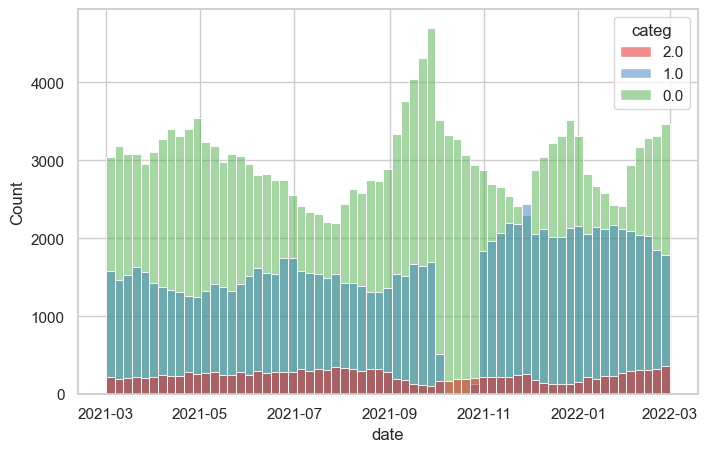

In [179]:
hue_order = [2.0, 1.0, 0.0]
sns.histplot(data = dataset2,  x = 'date', hue= 'categ', palette='Set1', hue_order=hue_order)

(array([18901., 18905., 18909., 18913., 18917., 18921., 18925., 18929.,
        18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

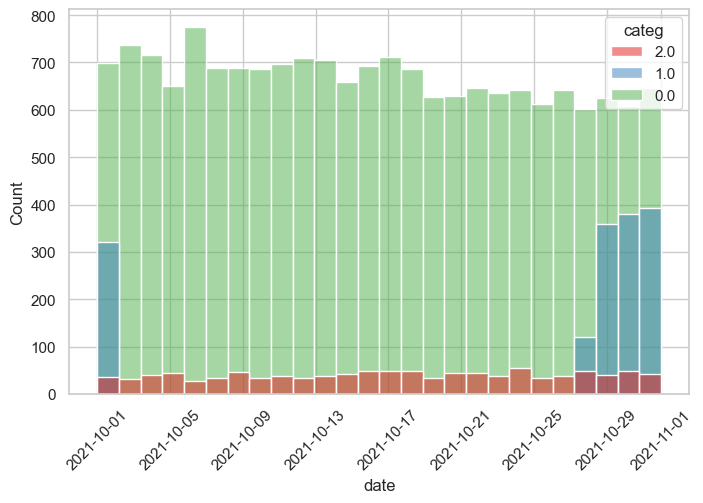

In [180]:
Activite_baisse= dataset2.loc[(dataset2['Année'] == 2021) & (dataset2['mois'] >= 10) &  (dataset2['mois'] < 11) & (dataset2['jour'] <= 31)]
sns.histplot(data = Activite_baisse,  x = 'date',  hue= 'categ', palette='Set1', hue_order=hue_order)
plt.xticks(rotation=45)

### 4. Expliciter categorie par prix <a class="anchor" id="petit14"></a>

avec client pro

<AxesSubplot:xlabel='categ', ylabel='price'>

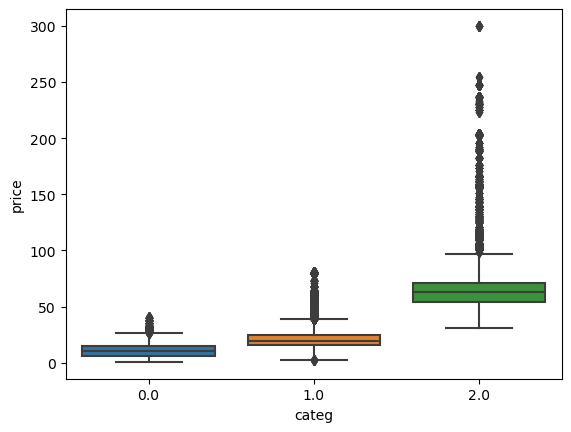

In [107]:
sns.boxplot(data=dataset, x="categ", y="price")

sans client pro

<AxesSubplot:xlabel='categ', ylabel='price'>

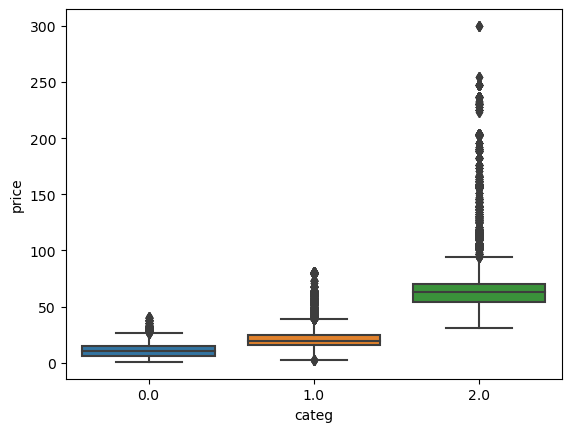

In [108]:
sns.boxplot(data=dataset2, x="categ", y="price")

### 5. Calcule du chiffre d'affaire <a class="anchor" id="petit15"></a>

#### a) Chiffre d'affaire avec les pro <a class="anchor" id="tit11"></a>

Calcule du chiffre d'affaire avec les clients pro.

In [109]:
data_montant_pro = dataset[['client_id','price']]
client_montant_pro = data_montant_pro.groupby(['client_id'])["price"].sum()
df_client_montant_pro= todataframe(client_montant_pro)
df_client_montant_pro.rename(columns = {'price':'ca'}, inplace = True)
df_client_montant_pro

,client_id,ca
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8595,c_995,119.08
8596,c_996,739.60
8597,c_997,572.89
8598,c_998,1527.69


In [110]:
caTotalAvecLesPro =client_montant_pro.sum()
caTotalAvecLesPro

5797606.739999999

Le chiffre d'affaire est de 5797606.7 euros ( si la libraire est en UE). 

#### b) chiffre d'affaire sans les pro <a class="anchor" id="tit12"></a>

In [111]:
data_montant = dataset2[['client_id','price']]
client_montant = data_montant.groupby(['client_id'])["price"].sum()
client_montant 
client_montant = todataframe(client_montant)
client_montant.rename(columns = {'price':'ca'}, inplace = True)
client_montant

,client_id,ca
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8591,c_995,119.08
8592,c_996,739.60
8593,c_997,572.89
8594,c_998,1527.69


In [112]:
caTotalSansLesPro = client_montant.sum()
caTotalSansLesPro

client_id    c_1c_10c_100c_1000c_1001c_1002c_1003c_1004c_10...
ca                                                  5363661.97
dtype: object

Le chiffre d'affaire est de 5363661.97 euros sans les clients pro qui rapportent 433944.77 au ca total. 

Les clients ayant le plus dépensé: 

<AxesSubplot:xlabel='ca', ylabel='client_id'>

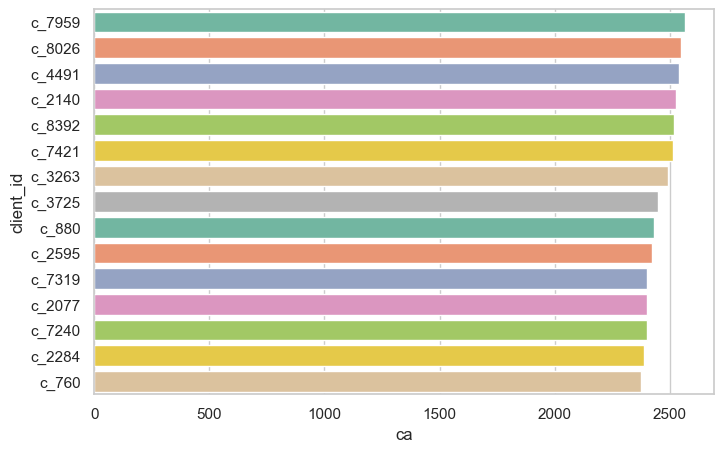

In [113]:
sns.set(rc={"figure.figsize":(8,5)},style='whitegrid')
sns.barplot(data=client_montant.sort_values('ca', ascending=False).head(15),y='client_id',x='ca',palette='Set2')


Les clients qui ont le moins dépensé: 

<AxesSubplot:xlabel='ca', ylabel='client_id'>

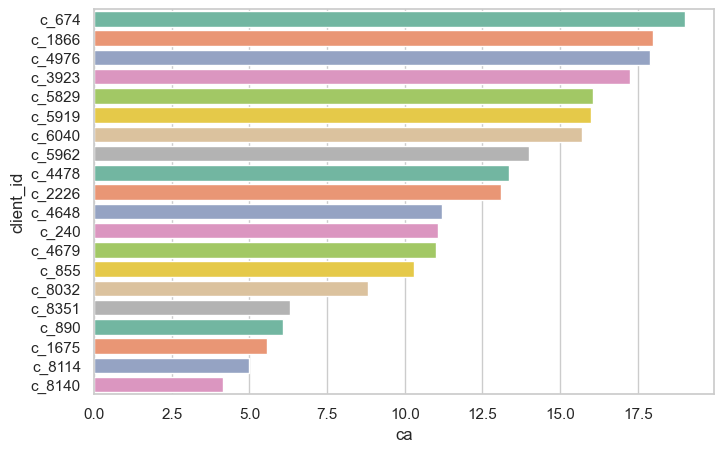

In [114]:
sns.barplot(data=client_montant.sort_values('ca', ascending=False).tail(20),y='client_id',x='ca',palette='Set2')

#### c) chiffre d'affaire par produit <a class="anchor" id="tit13"></a>

In [115]:
chiffre_affaire = dataset2.groupby(['id_prod','categ'])["price"].sum()
chiffre_affaire = todataframe(chiffre_affaire)
chiffre_affaire.rename(columns = {'price':'ca'}, inplace = True)
chiffre_affaire

,id_prod,categ,ca
0,0_0,0.0,2122.50
1,0_1,0.0,2604.63
2,0_10,0.0,197.45
3,0_100,0.0,41.20
4,0_1000,0.0,1402.20
...,...,...,...
3257,2_95,2.0,296.97
3258,2_96,2.0,12360.78
3259,2_97,2.0,643.96
3260,2_98,2.0,149.74


Nous avons calculé le Chiffre d'affaire par produit. Puis nous avons regardé quel categorie de produit rapportait le plus.

In [116]:
produit_cat_montant = dataset2.groupby(['categ'])["price"].sum()
df1 =  todataframe(produit_cat_montant) 
df1.rename(columns = {'price':'ca'}, inplace = True)
df1

,categ,ca
0,0.0,2078594.02
1,1.0,2101585.34
2,2.0,1183482.61


([<matplotlib.patches.Wedge at 0x1bd248076d0>,
 [Text(0.4152250869617982, 1.1258721628842092, 'Categorie 0'),
  Text(-1.038819894179687, -0.6007106020843185, 'Categorie 1'),
  Text(0.9999774982340919, -0.8306894744882031, 'Categorie 2')],
 [Text(0.24221463406104893, 0.6567587616824554, '38.8%'),
  Text(-0.6059782716048173, -0.35041451788251904, '39.2%'),
  Text(0.6153707681440566, -0.511193522761971, '22.1%')])

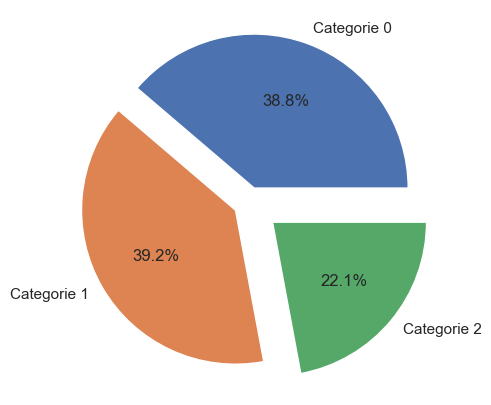

In [117]:
mp.pyplot.pie(x=df1.ca,labels=['Categorie 0','Categorie 1','Categorie 2'],  autopct='%1.1f%%',explode=[0.1,0.1,0.2])

<AxesSubplot:xlabel='ca', ylabel='id_prod'>

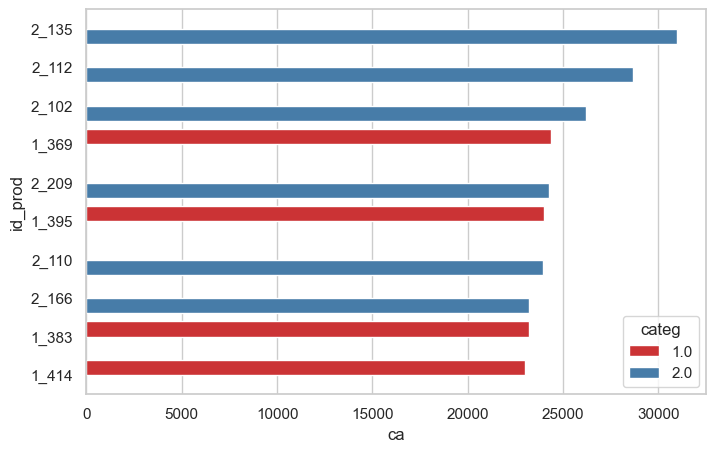

In [118]:
chiffre_affaire
sns.set(rc={"figure.figsize":(8,5)},style='whitegrid')
sns.barplot(data=chiffre_affaire.sort_values('ca', ascending=False).head(10),y='id_prod',x='ca',palette='Set1',  hue="categ")

<AxesSubplot:xlabel='ca', ylabel='id_prod'>

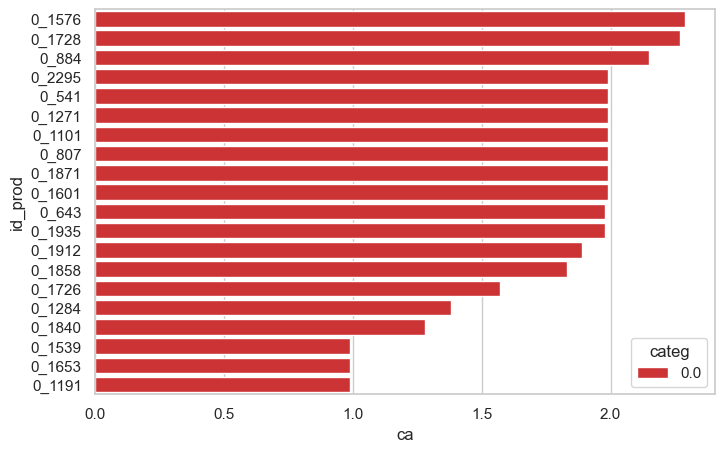

In [119]:
chiffre_affaire
sns.set(rc={"figure.figsize":(8,5)},style='whitegrid')
sns.barplot(data=chiffre_affaire.sort_values('ca', ascending=False).tail(20),y='id_prod',x='ca',palette='Set1',  hue="categ")

### 6. Recherche et identification d'outliers <a class="anchor" id="petit16"></a>

1) z_scores

In [120]:
x = chiffre_affaire['ca']
mean = x.mean()
std = x.std()
z_scores = abs((x-mean/std))
z_scores.describe()

count     3262.000000
mean      1643.777203
std       3229.694292
min          0.480885
25%        110.468385
50%        373.860885
75%       1576.823385
max      30976.000885
Name: ca, dtype: float64

In [121]:
outliers = x [z_scores >= 19]
outliers

0        2122.50
1        2604.63
2         197.45
3          41.20
4        1402.20
          ...   
3257      296.97
3258    12360.78
3259      643.96
3260      149.74
3261      169.98
Name: ca, Length: 3035, dtype: float64

2) calcule du quartile pour calculer les out

In [122]:
q1=np.quantile(chiffre_affaire['ca'],0.25)
q3=np.quantile(chiffre_affaire['ca'],0.75)
out= (q3 +1.5*(q3-q1)) 
outlier=chiffre_affaire.loc[chiffre_affaire['ca']> out ]
outlier

,id_prod,categ,ca
68,0_1061,0.0,3798.10
90,0_1083,0.0,4162.55
102,0_1094,0.0,4329.90
113,0_1103,0.0,3935.97
116,0_1106,0.0,3838.63
...,...,...,...
3224,2_62,2.0,13959.84
3232,2_7,2.0,9588.63
3241,2_79,2.0,9686.27
3251,2_9,2.0,9128.34


### 7. Groupe <a class="anchor" id="petit17"></a>

Montant par Client :

In [123]:
client_montant = data_montant.groupby(['client_id'])["price"].sum()
client_montant = todataframe(client_montant)
client_montant.rename(columns = {'price':'ca_client'}, inplace = True)
client_montant

,client_id,ca_client
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8591,c_995,119.08
8592,c_996,739.60
8593,c_997,572.89
8594,c_998,1527.69


fréquence de commande

In [124]:
client_nb_commande = dataset2.groupby(['client_id','Age','sex'])['price'].count()
client_nb_commande = todataframe(client_nb_commande)
client_nb_commande.rename(columns = {'price':'frequence'}, inplace = True)
client_nb_commande

,client_id,Age,sex,frequence
0,c_1,67,m,20
1,c_10,66,m,28
2,c_100,30,m,6
3,c_1000,56,f,56
4,c_1001,40,m,58
...,...,...,...,...
8591,c_995,67,m,8
8592,c_996,52,f,42
8593,c_997,28,f,23
8594,c_998,21,m,28


In [125]:
client_d= pd.merge(client_nb_commande, client_montant, on='client_id', how='outer',indicator=True)
client_d= client_d.drop('_merge', axis=1)
client_d

,client_id,Age,sex,frequence,ca_client
0,c_1,67,m,20,300.65
1,c_10,66,m,28,586.18
2,c_100,30,m,6,222.87
3,c_1000,56,f,56,980.02
4,c_1001,40,m,58,1102.45
...,...,...,...,...,...
8591,c_995,67,m,8,119.08
8592,c_996,52,f,42,739.60
8593,c_997,28,f,23,572.89
8594,c_998,21,m,28,1527.69


On defini la date de reference pour le resence

In [126]:
dataset2['date'] = pd.to_datetime(dataset2['date'])
dateRef = max(dataset2['date'])

In [127]:
#On crée la fonction pour le Calcul de la recenser :
def CalculRecense(date) :
    recense = dateRef - date
    return(recense.dt.days)

In [155]:
#On fait une new dataframe ou on prend ceux dont a besoin :
data_date =dataset2[['client_id','date']]
data_client_last_date = data_date.groupby(['client_id']).max()

In [156]:
datarecence =  CalculRecense(data_client_last_date['date'])
datarecence

client_id
c_1        27
c_10       76
c_100     202
c_1000      0
c_1001      2
         ... 
c_995     116
c_996      22
c_997      54
c_998       5
c_999       6
Name: date, Length: 8596, dtype: int64

In [130]:
#On creer la nouvelle colonne recense  avec les valeur 
data_client_last_date["récence"] =  CalculRecense(data_client_last_date['date'])
data_client_last_date.sort_values(by=['récence'])
data_client_last_date.reset_index()

,client_id,date,récence
0,c_1,2022-02-01 01:47:04.355850,27
1,c_10,2021-12-14 09:16:40.399630,76
2,c_100,2021-08-10 15:58:52.647110,202
3,c_1000,2022-02-28 08:19:38.189089,0
4,c_1001,2022-02-26 15:08:28.714777,2
...,...,...,...
8591,c_995,2021-11-04 12:35:05.210300,116
8592,c_996,2022-02-06 16:40:04.292360,22
8593,c_997,2022-01-05 02:02:14.787358,54
8594,c_998,2022-02-23 17:54:34.183475,5


In [131]:
rfm= pd.merge(client_d, data_client_last_date, on='client_id', how='outer',indicator=True)
rfm= rfm.drop('_merge', axis=1)
rfm

,client_id,Age,sex,frequence,ca_client,date,récence
0,c_1,67,m,20,300.65,2022-02-01 01:47:04.355850,27
1,c_10,66,m,28,586.18,2021-12-14 09:16:40.399630,76
2,c_100,30,m,6,222.87,2021-08-10 15:58:52.647110,202
3,c_1000,56,f,56,980.02,2022-02-28 08:19:38.189089,0
4,c_1001,40,m,58,1102.45,2022-02-26 15:08:28.714777,2
...,...,...,...,...,...,...,...
8591,c_995,67,m,8,119.08,2021-11-04 12:35:05.210300,116
8592,c_996,52,f,42,739.60,2022-02-06 16:40:04.292360,22
8593,c_997,28,f,23,572.89,2022-01-05 02:02:14.787358,54
8594,c_998,21,m,28,1527.69,2022-02-23 17:54:34.183475,5


In [132]:
rfm["Age"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8596 entries, 0 to 8595
Series name: Age
Non-Null Count  Dtype
--------------  -----
8596 non-null   int64
dtypes: int64(1)
memory usage: 134.3 KB


In [133]:
rfm['AgeGroup']= pd.cut(x=rfm["Age"],bins= [18,30,45,60,75,95], labels=['(18, 30]','(30, 45]','(45, 60]','(60, 75]','(75, 95]'] )
rfm


,client_id,Age,sex,frequence,ca_client,date,récence,AgeGroup
0,c_1,67,m,20,300.65,2022-02-01 01:47:04.355850,27,"(60, 75]"
1,c_10,66,m,28,586.18,2021-12-14 09:16:40.399630,76,"(60, 75]"
2,c_100,30,m,6,222.87,2021-08-10 15:58:52.647110,202,"(18, 30]"
3,c_1000,56,f,56,980.02,2022-02-28 08:19:38.189089,0,"(45, 60]"
4,c_1001,40,m,58,1102.45,2022-02-26 15:08:28.714777,2,"(30, 45]"
...,...,...,...,...,...,...,...,...
8591,c_995,67,m,8,119.08,2021-11-04 12:35:05.210300,116,"(60, 75]"
8592,c_996,52,f,42,739.60,2022-02-06 16:40:04.292360,22,"(45, 60]"
8593,c_997,28,f,23,572.89,2022-01-05 02:02:14.787358,54,"(18, 30]"
8594,c_998,21,m,28,1527.69,2022-02-23 17:54:34.183475,5,"(18, 30]"


<AxesSubplot:xlabel='count', ylabel='AgeGroup'>

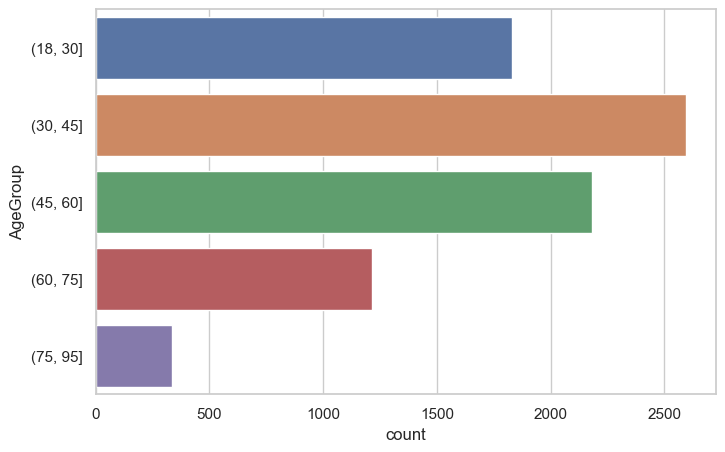

In [134]:
sns.countplot(data=rfm, y= "AgeGroup")

<AxesSubplot:>

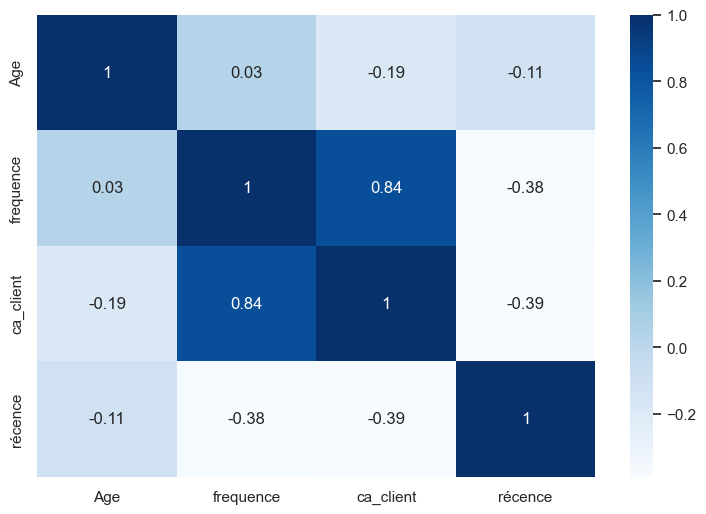

In [256]:
fig, ax = plt.subplots(figsize=(9,6))   
sns.heatmap(rfm.corr(),cmap='Blues',annot=True,ax=ax)

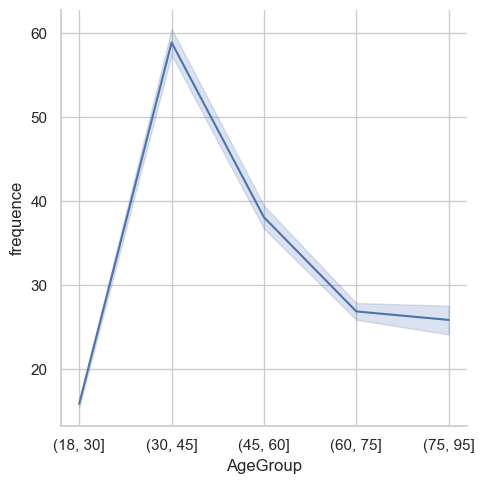

In [135]:
sns.relplot(data=rfm, x="AgeGroup", y="frequence", kind="line")

In [136]:
type_client = rfm.sex.apply(lambda x: 
                                           "femme" if x=="f" 
                                       else "homme" if x == "m"
                                       else "NAN")
type_clients= type_client.value_counts()
type_clients

femme    4478
homme    4118
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1bd119c5310>,
 [Text(-0.07888481106565828, 1.1974043538350507, ''),
  Text(0.07888469895657158, -1.1974043612207745, '')],
 [Text(-0.046016139788300665, 0.6984858730704463, '52.1%'),
  Text(0.046016074391333414, -0.6984858773787852, '47.9%')])

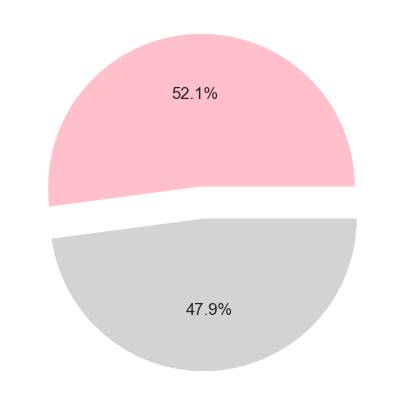

In [137]:

mp.pyplot.pie(x=type_clients,  autopct='%1.1f%%',explode=[0.1,0.1], colors = ['pink', 'lightgrey'])

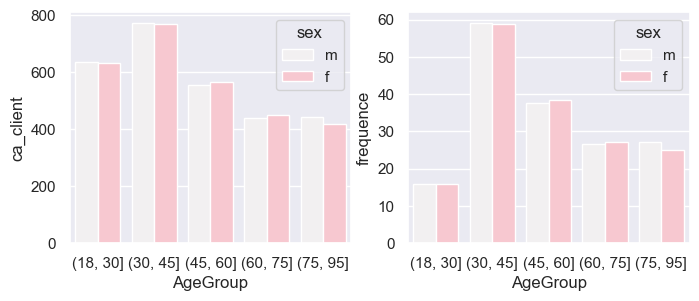

In [138]:
sns.set(rc={"figure.figsize":(8,3)},style='darkgrid')
fig, ax =plt.subplots(1,2)
sns.barplot(data=rfm, x='AgeGroup',y='ca_client',hue = 'sex' ,color = 'pink',ci=None,ax=ax[0])
sns.barplot(data=rfm, x='AgeGroup',y='frequence', hue = 'sex', color = 'pink' , ci=None,ax=ax[1])
fig.show()


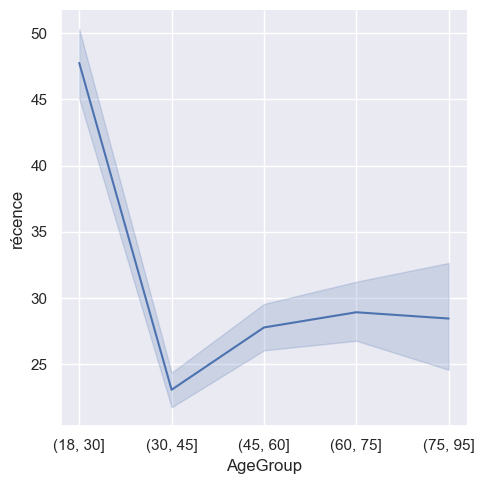

In [139]:
sns.relplot(data=rfm, x="AgeGroup", y="récence", kind="line")

In [140]:

dataset2['AgeGroup']= pd.cut(x=dataset2["Age"],bins= [18,30,45,60,75,95], labels=['(18, 30]','(30, 45]','(45, 60]','(60, 75]','(75, 95]'])
dataset2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age,Année,mois,jour,AgeGroup
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45,2021,4,10,"(30, 45]"
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45,2021,9,29,"(30, 45]"
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45,2021,8,27,"(30, 45]"
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45,2021,8,27,"(30, 45]"
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45,2021,12,28,"(30, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967,55,2021,9,25,"(45, 60]"
336812,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933,89,2021,6,1,"(75, 95]"
336813,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933,89,2021,10,9,"(75, 95]"
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970,52,2021,9,15,"(45, 60]"


In [141]:
categ_ages= dataset2.groupby(['AgeGroup','categ','sex'])["price"].count()
categ_ages = todataframe(categ_ages)
categ_ages.rename(columns = {'price':'frequence'}, inplace = True)
categ_ages 

,AgeGroup,categ,sex,frequence
0,"(18, 30]",0.0,f,3471
1,"(18, 30]",0.0,m,3210
2,"(18, 30]",1.0,f,5616
3,"(18, 30]",1.0,m,5157
4,"(18, 30]",2.0,f,5981
5,"(18, 30]",2.0,m,5585
6,"(30, 45]",0.0,f,60305
7,"(30, 45]",0.0,m,57195
8,"(30, 45]",1.0,f,17888
9,"(30, 45]",1.0,m,16984


<AxesSubplot:xlabel='AgeGroup', ylabel='frequence'>

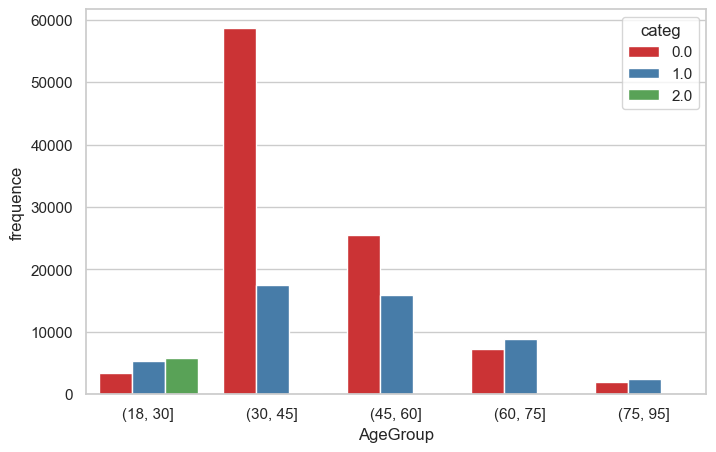

In [142]:
sns.set(rc={"figure.figsize":(8,5)},style='whitegrid')
sns.barplot(data=categ_ages , x='AgeGroup',y='frequence',hue = 'categ', palette='Set1', ci= False )

<AxesSubplot:>

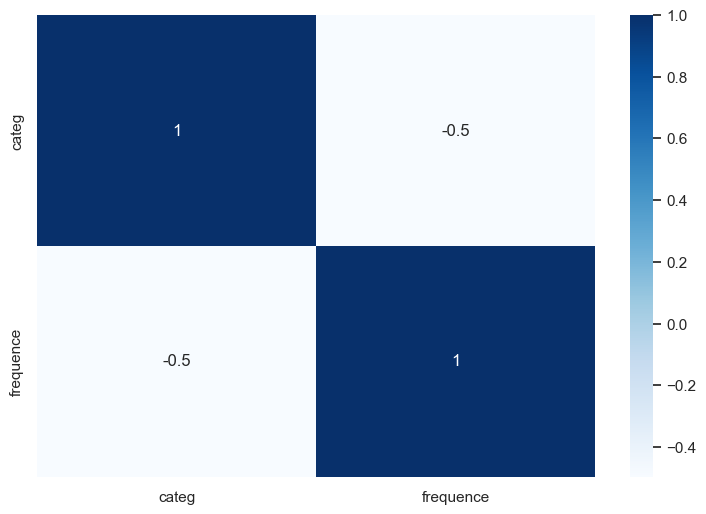

In [149]:
data_produit_montant = dataset2[['id_prod','price']]
produit_montant = data_produit_montant .groupby(['id_prod'])["price"].sum()
produit_montant 
produit_montant = todataframe(produit_montant)
produit_montant.rename(columns = {'price':'ca'}, inplace = True)
produit_montant

,id_prod,ca
0,0_0,2122.50
1,0_1,2604.63
2,0_10,197.45
3,0_100,41.20
4,0_1000,1402.20
...,...,...
3257,2_95,296.97
3258,2_96,12360.78
3259,2_97,643.96
3260,2_98,149.74


In [153]:
Produit_commande = dataset2.groupby(['id_prod','categ'])['price'].count()
Produit_commande
Produit_commande.to_frame()
Produit_commande= Produit_commande.reset_index()
Produit_commande.rename(columns = {'price':'frequence'}, inplace = True)
Produit_commande

,id_prod,categ,frequence
0,0_0,0.0,566
1,0_1,0.0,237
2,0_10,0.0,11
3,0_100,0.0,2
4,0_1000,0.0,205
...,...,...,...
3257,2_95,2.0,3
3258,2_96,2.0,258
3259,2_97,2.0,4
3260,2_98,2.0,1


In [154]:
produit_d= pd.merge(Produit_commande, produit_montant, on='id_prod', how='outer',indicator=True)
produit_d= produit_d.drop('_merge', axis=1)
produit_d

,id_prod,categ,frequence,ca
0,0_0,0.0,566,2122.50
1,0_1,0.0,237,2604.63
2,0_10,0.0,11,197.45
3,0_100,0.0,2,41.20
4,0_1000,0.0,205,1402.20
...,...,...,...,...
3257,2_95,2.0,3,296.97
3258,2_96,2.0,258,12360.78
3259,2_97,2.0,4,643.96
3260,2_98,2.0,1,149.74


In [185]:
#On fait une new dataframe ou on prend ceux dont a besoin :
data_date =dataset2[['id_prod','date']]
data_produit_last_date = data_date.groupby(['id_prod']).max()

In [186]:
datarecenceProduit =  CalculRecense(data_produit_last_date['date'])
datarecenceProduit 

id_prod
0_0         0
0_1         0
0_10       58
0_100     114
0_1000      0
         ... 
2_95        2
2_96        0
2_97        0
2_98      357
2_99       99
Name: date, Length: 3262, dtype: int64

In [187]:
data_produit_last_date["récence"] =  CalculRecense(data_produit_last_date['date'])
data_produit_last_date.sort_values(by=['récence'])
data_produit_last_date.reset_index()

,id_prod,date,récence
0,0_0,2022-02-28 21:46:33.919651,0
1,0_1,2022-02-28 12:36:49.021846,0
2,0_10,2022-01-01 18:30:59.958927,58
3,0_100,2021-11-06 20:52:21.946694,114
4,0_1000,2022-02-28 05:42:37.931101,0
...,...,...,...
3257,2_95,2022-02-26 23:30:40.129955,2
3258,2_96,2022-02-28 07:11:42.614655,0
3259,2_97,2022-02-28 07:31:38.046261,0
3260,2_98,2021-03-08 21:10:32.250919,357


In [192]:
rfm_produit= pd.merge(produit_d, data_produit_last_date, on='id_prod', how='outer',indicator=True)
rfm_produit= rfm_produit.drop('_merge', axis=1)
rfm_produit


,id_prod,categ,frequence,ca,date,récence
0,0_0,0.0,566,2122.50,2022-02-28 21:46:33.919651,0
1,0_1,0.0,237,2604.63,2022-02-28 12:36:49.021846,0
2,0_10,0.0,11,197.45,2022-01-01 18:30:59.958927,58
3,0_100,0.0,2,41.20,2021-11-06 20:52:21.946694,114
4,0_1000,0.0,205,1402.20,2022-02-28 05:42:37.931101,0
...,...,...,...,...,...,...
3257,2_95,2.0,3,296.97,2022-02-26 23:30:40.129955,2
3258,2_96,2.0,258,12360.78,2022-02-28 07:11:42.614655,0
3259,2_97,2.0,4,643.96,2022-02-28 07:31:38.046261,0
3260,2_98,2.0,1,149.74,2021-03-08 21:10:32.250919,357


In [195]:
categ_prod = rfm_produit['categ'].groupby(rfm_produit['categ'])
nbre_produit_par_categ = categ_prod.describe()
nbre_produit_par_categ


,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0.0,2290.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,737.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2.0,235.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [240]:
rfm_categ_0= rfm_produit.loc[(rfm_produit['categ'] == 0)]
rfm_categ_top = rfm_categ_0.sort_values('frequence', ascending=False)
rfm_categ_0_top = rfm_categ_top.head(10)
rfm_categ_0_top

,id_prod,categ,frequence,ca,date,récence
465,0_1422,0.0,630,7188.30,2022-02-28 15:43:11.765109,0
468,0_1425,0.0,602,7819.98,2022-02-28 21:54:58.298740,0
471,0_1428,0.0,596,2115.80,2022-02-28 14:25:12.433181,0
475,0_1431,0.0,591,6495.09,2022-02-27 21:05:56.262392,1
478,0_1434,0.0,591,5070.78,2022-02-28 01:08:35.792934,0
453,0_1411,0.0,580,5214.20,2022-02-28 22:59:27.006643,0
476,0_1432,0.0,580,8908.80,2022-02-28 16:13:32.699583,0
486,0_1441,0.0,580,11014.20,2022-02-28 23:55:30.088910,0
458,0_1416,0.0,577,5516.12,2022-02-28 22:29:06.850040,0
490,0_1445,0.0,575,5744.25,2022-02-27 07:04:12.225755,1


In [209]:
tete2 = rfm_categ_0.sort_values('récence', ascending=True)
tete2

,id_prod,categ,frequence,ca,date,récence
0,0_0,0.0,566,2122.50,2022-02-28 21:46:33.919651,0
535,0_1486,0.0,356,1740.84,2022-02-28 20:57:20.019842,0
536,0_1487,0.0,298,1487.02,2022-02-28 06:58:01.735466,0
537,0_1488,0.0,339,1559.40,2022-02-28 14:44:51.566617,0
538,0_1489,0.0,275,3022.25,2022-02-28 05:36:56.896718,0
...,...,...,...,...,...,...
2157,0_88,0.0,1,8.30,2021-03-17 02:11:16.105651,348
2164,0_886,0.0,1,21.82,2021-03-17 03:34:14.461358,348
588,0_1533,0.0,1,27.99,2021-03-09 13:43:02.826619,356
1783,0_541,0.0,1,1.99,2021-03-08 23:45:11.524853,357


In [241]:
rfm_categ_0_tete= rfm_produit.loc[(rfm_produit['frequence'] > 250) & (rfm_produit['récence'] <=1) ]
rfm_categ_0_tete

,id_prod,categ,frequence,ca,date,récence
0,0_0,0.0,566,2122.50,2022-02-28 21:46:33.919651,0
96,0_1089,0.0,258,1029.42,2022-02-28 12:00:10.669875,0
99,0_1091,0.0,254,2537.46,2022-02-28 16:08:27.290000,0
102,0_1094,0.0,255,4329.90,2022-02-27 21:58:34.071933,1
103,0_1095,0.0,279,1950.21,2022-02-28 07:41:26.545633,0
...,...,...,...,...,...,...
3196,2_37,2.0,383,18763.17,2022-02-27 22:35:45.039361,1
3198,2_39,2.0,391,22674.09,2022-02-27 18:23:20.471996,1
3203,2_43,2.0,326,22816.74,2022-02-28 11:14:03.835923,0
3206,2_46,2.0,321,13260.51,2022-02-28 05:03:24.316041,0


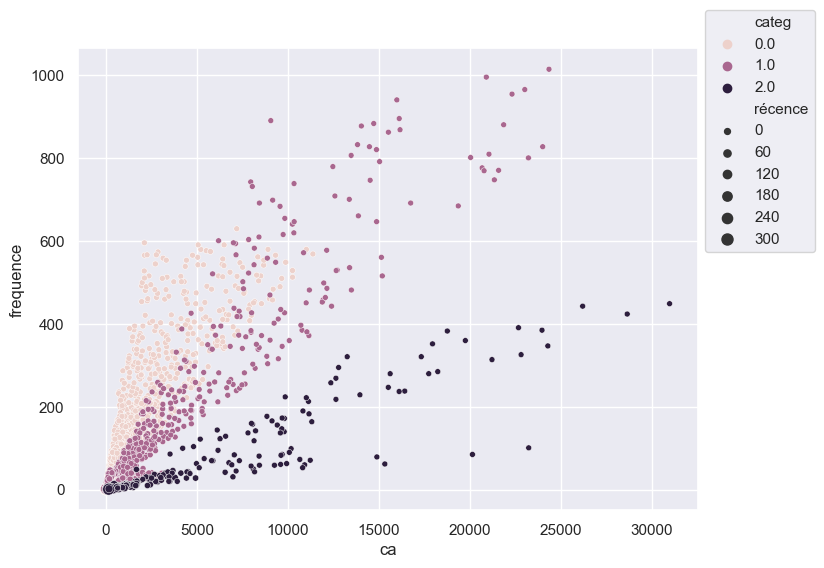

In [249]:
 sns.set(style="darkgrid",rc={'figure.figsize':(8,6)}, palette = "flare")
nouveau= sns.scatterplot(y="frequence", x="ca", data=rfm_produit, hue=rfm_produit.categ, size = rfm_produit.récence)
nouveau.legend(bbox_to_anchor=(1, 1.1), loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0_1422'),
  Text(1, 0, '0_1425'),
  Text(2, 0, '0_1428'),
  Text(3, 0, '0_1431'),
  Text(4, 0, '0_1434'),
  Text(5, 0, '0_1411'),
  Text(6, 0, '0_1432'),
  Text(7, 0, '0_1441'),
  Text(8, 0, '0_1416'),
  Text(9, 0, '0_1445')])

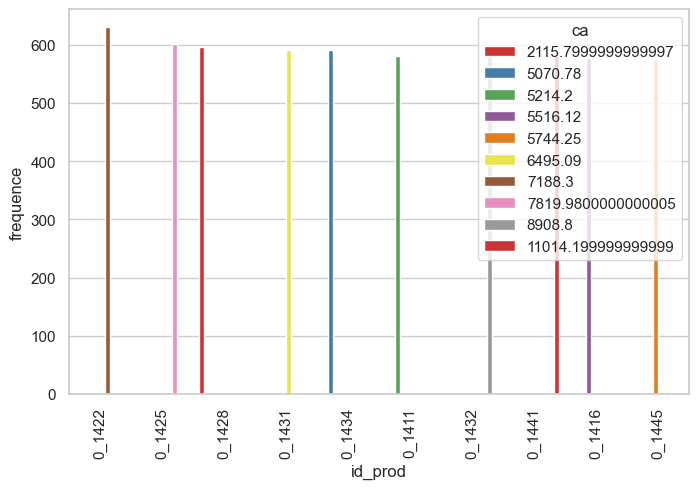

In [244]:
sns.set(rc={"figure.figsize":(8,5)},style='whitegrid')
sns.barplot(data=rfm_categ_0_top , x='ca',y='frequence', hue= 'categ',palette='Set1', ci= False )
plt.xticks(rotation=90)

<AxesSubplot:>

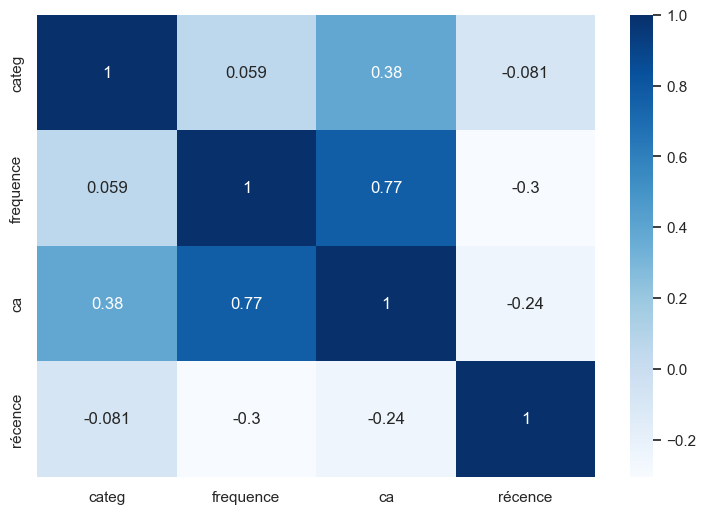

In [250]:
fig, ax = plt.subplots(figsize=(9,6))   
sns.heatmap(rfm_produit.corr(),cmap='Blues',annot=True,ax=ax)

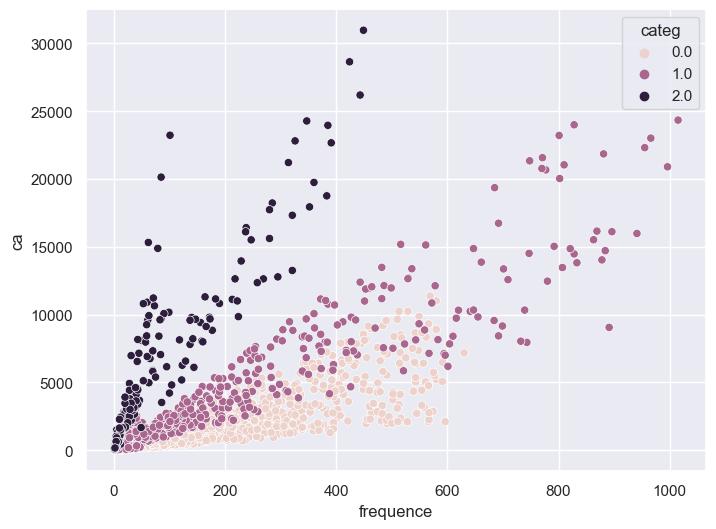

In [254]:
ax=sns.scatterplot(rfm_produit['frequence'],rfm_produit['ca'], hue = rfm_produit.categ)

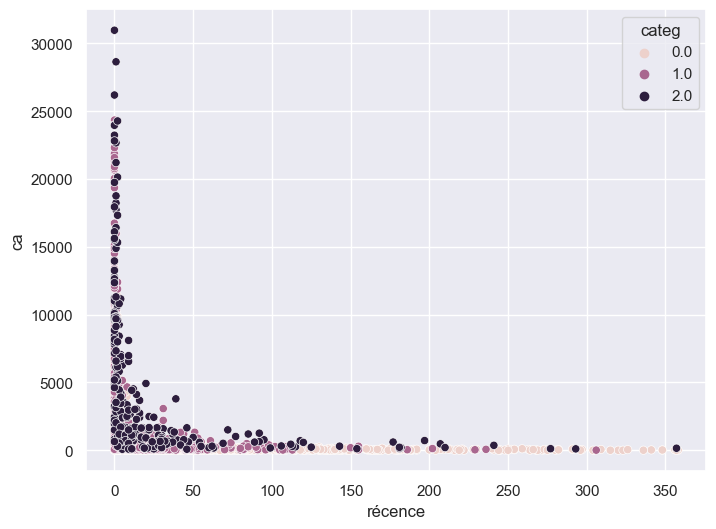

In [255]:
ax=sns.scatterplot(rfm_produit['récence'],rfm_produit['ca'],hue = rfm_produit.categ) 